In [2]:
import pandas as pd
df = pd.read_excel('/content/Online Retail.xlsx')
# Show first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]
# Remove returns (Quantity <= 0)
df = df[df['Quantity'] > 0]
# Create a new column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
# View cleaned data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [4]:
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',   # Number of unique purchases
    'Quantity': 'sum',        # Total items bought
    'TotalPrice': 'sum'       # Total amount spent
}).rename(columns={'InvoiceNo': 'Frequency'})  # Renaming for clarity

# View the first few rows of the new customer-level data
customer_df.head()

,Frequency,Quantity,TotalPrice
CustomerID,,,
12346.0,1,74215,77183.60
12347.0,7,2458,4310.00
12348.0,4,2341,1797.24
12349.0,1,631,1757.55
12350.0,1,197,334.40


from matplotlib import pyplot as plt
_df_0['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TotalPrice'].plot(kind='hist', bins=20, title='TotalPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Frequency', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Quantity', y='TotalPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['TotalPrice'].plot(kind='line', figsize=(8, 4), title='TotalPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Apply it to our customer-level data
scaled_data = scaler.fit_transform(customer_df)
# print the shape and preview the scaled data
print(scaled_data.shape)
scaled_data[:5]  #Show first 5 rows of the scaled values


(4339, 3)


array([[-0.42467487, 14.44520088,  8.35963391],
       [ 0.35408019,  0.25000604,  0.25104636],
       [-0.03529734,  0.22686074, -0.02854645],
       [-0.42467487, -0.11141683, -0.03296273],
       [-0.42467487, -0.19727207, -0.19131549]])

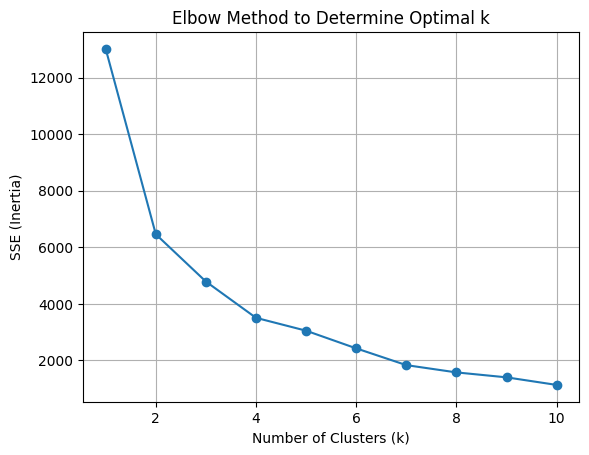

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Store sum of squared errors for each k
sse = []

# Try cluster counts from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # Inertia = SSE

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


In [7]:
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Assign each customer to a cluster
customer_df['Cluster'] = kmeans.labels_

# View the first few clustered customers
customer_df.head()


,Frequency,Quantity,TotalPrice,Cluster
CustomerID,,,,
12346.0,1,74215,77183.60,2
12347.0,7,2458,4310.00,3
12348.0,4,2341,1797.24,0
12349.0,1,631,1757.55,0
12350.0,1,197,334.40,0


from matplotlib import pyplot as plt
_df_8['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['TotalPrice'].plot(kind='hist', bins=20, title='TotalPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Frequency', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Quantity', y='TotalPrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='TotalPrice', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['TotalPrice'].plot(kind='line', figsize=(8, 4), title='TotalPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

/tmp/ipython-input-9-1018955915.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=plot_df, palette='Set2', s=50)
/tmp/ipython-input-9-1018955915.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


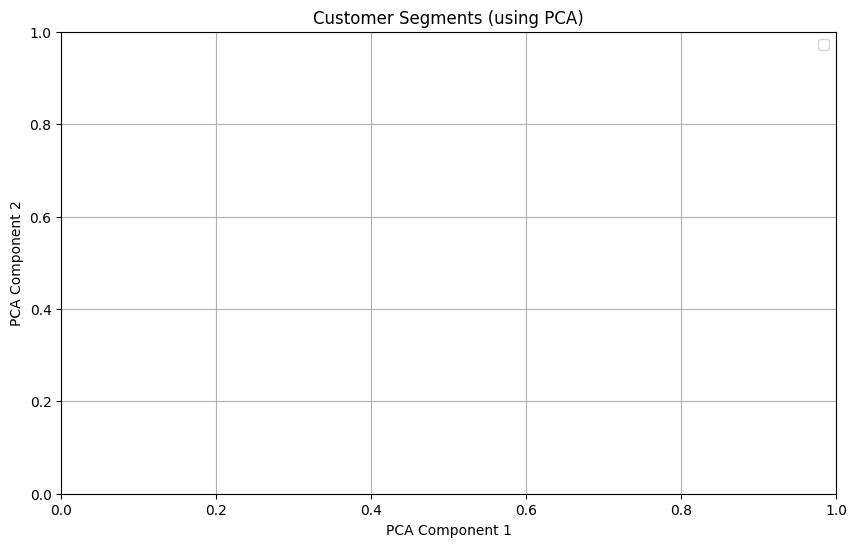

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce data to 2D for plotting
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = customer_df['Cluster']

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=plot_df, palette='Set2', s=50)
plt.title('Customer Segments (using PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
customer_df.head()

,Frequency,Quantity,TotalPrice,Cluster
CustomerID,,,,
12346.0,1,74215,77183.60,2
12347.0,7,2458,4310.00,3
12348.0,4,2341,1797.24,0
12349.0,1,631,1757.55,0
12350.0,1,197,334.40,0


In [11]:
plot_df['Cluster'] = customer_df['Cluster'].values

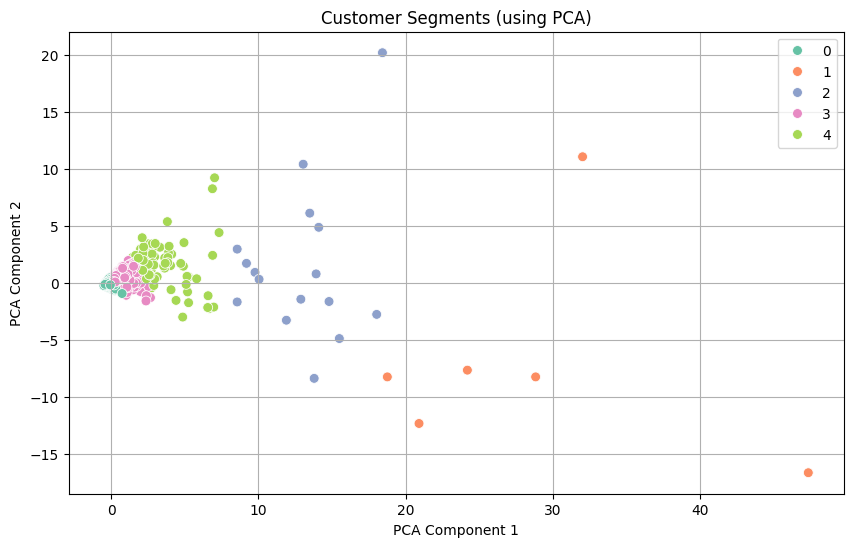

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=plot_df, palette='Set2', s=50)
plt.title('Customer Segments (using PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()
plt.show()
